# Hurricane Michael GeoDataFrames

In [1]:
#import everything
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude
import geopy
from geopy.geocoders import Nominatim

import folium

%matplotlib inline

## Plotting on Folium

In [2]:
#read the csv to get a dataframe
location = "hurricaneMichael.csv"
michael_df = pd.read_csv(location)
michael_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/06/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven
1,1A,10/06/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila
2,2,10/06/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila
3,2A,10/07/2018 02:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg
4,3,10/07/2018 05:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg


In [3]:
#due to a bug(feature) in the data entry, all of the longitude values are only enterd as their absolute values
#in that they are positive and should be negative
#this line fixes that
michael_df['Long'] = 0 - michael_df['Long']

In [4]:
#looking at the fixed data
michael_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg


In [5]:
#getting an idea of the hurricane's range so we can center the map later
michael_df.tail()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
40,21,10/11/2018 17:00,36.1,-78.8,50,990,NE at 24 MPH (50 deg),Tropical Storm,Michael,10/11/2018 16:53,Brown
41,21A,10/11/2018 20:00,36.5,-77.8,50,989,NE at 24 MPH (50 deg),Tropical Storm,Michael,10/11/2018 19:50,Berg
42,22,10/11/2018 23:00,37.1,-76.1,50,988,NE at 25 MPH (55 deg),Tropical Storm,Michael,10/11/2018 22:53,Berg
43,22A,10/12/2018 02:00,37.3,-75.1,60,985,NE at 25 MPH (55 deg),Tropical Storm,Michael,10/12/2018 01:50,Beven
44,23,10/12/2018 05:00,38.0,-73.1,65,983,ENE at 29 MPH (65 deg),Post-Tropical Cyclone,Michael,10/12/2018 04:50,Beven


In [6]:
#this makes a map centered at those coordinates
map1 = folium.Map(
    location=[25, -81],
    tiles='cartodbpositron',
    zoom_start=4,
)

#this places the coordinates from the dataframe onto the map
michael_df.apply(lambda row:folium.CircleMarker(location=[row["Lat"], row["Long"]]).add_to(map1), axis=1)

map1

## Making a GeoDataFrame

In [7]:
#just checking for null values before doing things to the dataset to make a geodataframe
michael_df.count()

AdvisoryNumber    45
Date              45
Lat               45
Long              45
Wind              45
Pres              45
Movement          45
Type              45
Name              45
Received          45
Forecaster        45
dtype: int64

In [8]:
#while folium accepts two columns and uses those two make points, here we make a new column for points
michael_df['coordinates'] = list(michael_df[['Long', 'Lat']].values)
michael_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,"[-86.6, 18.0]"
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,"[-86.6, 18.3]"
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,"[-86.6, 18.8]"
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,"[-87.1, 18.4]"
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,"[-86.9, 18.6]"


In [9]:
#they can't just be ordered pairs, they have to be a point thing
michael_df['coordinates'] = michael_df['coordinates'].apply(Point)
michael_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,POINT (-86.59999999999999 18)
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,POINT (-86.59999999999999 18.3)
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,POINT (-86.59999999999999 18.8)
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,POINT (-87.09999999999999 18.4)
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,POINT (-86.90000000000001 18.6)


In [10]:
#they can't just be points, they have to be a geometry point thing, now it's a geodataframe
geo_michael = gpd.GeoDataFrame(michael_df, geometry='coordinates')
geo_michael.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,POINT (-86.60000 18.00000)
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,POINT (-86.60000 18.30000)
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,POINT (-86.60000 18.80000)
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,POINT (-87.10000 18.40000)
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,POINT (-86.90000 18.60000)


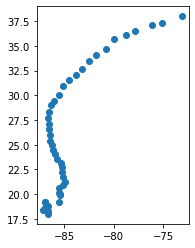

In [11]:
#you can plot in on an x-y axis like this
geo_michael.plot()

In [12]:
#to get the map to plot the hurricane path on
#oh no a dangling participle
#With regards to the path of hurricane Michael, this file contains the map on which it will be placed. Below are its contents.
map_df = pd.read_json('US_states(5m).json')
map_df.head()

,type,features
0,FeatureCollection,"{'type': 'Feature', 'properties': {'GEO_ID': '..."
1,FeatureCollection,"{'type': 'Feature', 'properties': {'GEO_ID': '..."
2,FeatureCollection,"{'type': 'Feature', 'properties': {'GEO_ID': '..."
3,FeatureCollection,"{'type': 'Feature', 'properties': {'GEO_ID': '..."
4,FeatureCollection,"{'type': 'Feature', 'properties': {'GEO_ID': '..."


In [13]:
#the relevant information for the states is in there, but only in the features column, in another dictionary
map_df['features']

0     {'type': 'Feature', 'properties': {'GEO_ID': '...
1     {'type': 'Feature', 'properties': {'GEO_ID': '...
2     {'type': 'Feature', 'properties': {'GEO_ID': '...
3     {'type': 'Feature', 'properties': {'GEO_ID': '...
4     {'type': 'Feature', 'properties': {'GEO_ID': '...
5     {'type': 'Feature', 'properties': {'GEO_ID': '...
6     {'type': 'Feature', 'properties': {'GEO_ID': '...
7     {'type': 'Feature', 'properties': {'GEO_ID': '...
8     {'type': 'Feature', 'properties': {'GEO_ID': '...
9     {'type': 'Feature', 'properties': {'GEO_ID': '...
10    {'type': 'Feature', 'properties': {'GEO_ID': '...
11    {'type': 'Feature', 'properties': {'GEO_ID': '...
12    {'type': 'Feature', 'properties': {'GEO_ID': '...
13    {'type': 'Feature', 'properties': {'GEO_ID': '...
14    {'type': 'Feature', 'properties': {'GEO_ID': '...
15    {'type': 'Feature', 'properties': {'GEO_ID': '...
16    {'type': 'Feature', 'properties': {'GEO_ID': '...
17    {'type': 'Feature', 'properties': {'GEO_ID

In [14]:
#this will make the relevant geodataframe using the features column
geo_map = gpd.GeoDataFrame.from_features(map_df["features"])

In [15]:
#you can read it now
geo_map.head()

,geometry,GEO_ID,STATE,NAME,LSAD,CENSUSAREA
0,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ...",0400000US01,01,Alabama,,50645.326
1,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752...",0400000US02,02,Alaska,,570640.950
2,"POLYGON ((-112.53859 37.00067, -112.53454 37.0...",0400000US04,04,Arizona,,113594.084
3,"POLYGON ((-94.04296 33.01922, -94.04304 33.079...",0400000US05,05,Arkansas,,52035.477
4,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213...",0400000US06,06,California,,155779.220


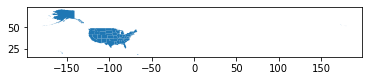

In [16]:
#this can be a little hard to read, with alaska and hawaii distorting the map
geo_map.plot()

In [17]:
#but they can be removed from the dataframe itself
geo_map = geo_map.loc[geo_map['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]

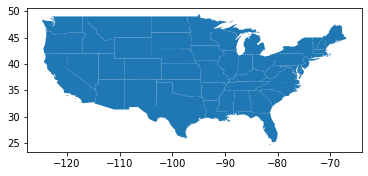

In [18]:
#the contiguous 50-2 states of america
geo_map.plot()

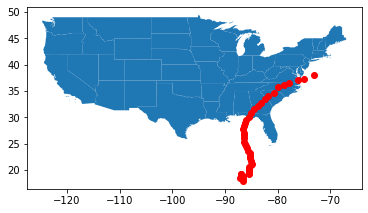

In [19]:
#instead of trying to make one geodataframe with the map and the path, the shared coordinate system allows you to just plot them on top of each other
ax = geo_map.plot()
geo_michael.plot(ax=ax, color = 'red')